In [110]:
import pandas as pd
import numpy as np
T = 1
nsteps = 12
files = [
    f'../data/export/test/zerobond_1_test_results_sigma_0.01_{T}_1000_{nsteps}.csv',
    f'../data/export/test/zerobond_1_test_results_sigma_0.0075_{T}_1000_{nsteps}.csv',
    f'../data/export/test/zerobond_1_test_results_sigma_0.005_{T}_1000_{nsteps}.csv',
]
sigmas = [
    0.01,
    0.0075,
    0.005
]
test_df = pd.DataFrame()
for i, file in enumerate(files):
    test_df_tmp = pd.read_csv(
        file
    )
    test_df_tmp['sigma'] = sigmas[i]
    # Concat
    test_df = pd.concat(
        [
            test_df,
            test_df_tmp
        ]
    )
# Error
test_df['ae'] = np.abs(test_df['V_est'] - test_df['V'])
test_df['pae'] = np.abs(test_df['V_est'] - test_df['V'])/test_df['V']
test_df['se'] = (test_df['V_est'] - test_df['V'])**2
# Filter by sigma
'''test_df = test_df.loc[
    (test_df.sigma == 0.01) |
    (test_df.sigma == 0.001)
]'''

'test_df = test_df.loc[\n    (test_df.sigma == 0.01) |\n    (test_df.sigma == 0.001)\n]'

### Simulations checks

For each time step we know that the distribution of $W$ should be $\mathcal{N}(0, t)$ since it is a Wiener process, thus we are expected to see that:

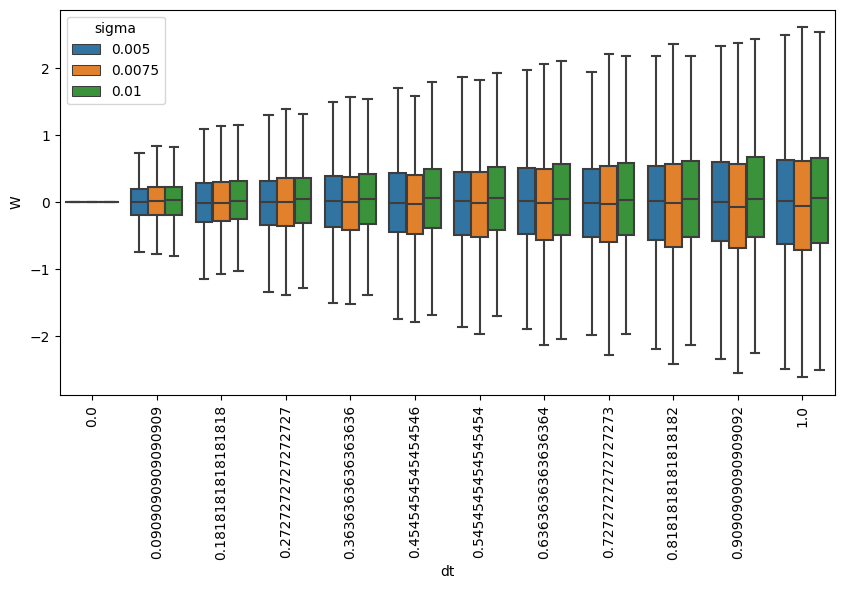

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(
    figsize = (10, 5)
)
sns.boxplot(
    x = 'dt',
    y = 'W',
    data = test_df, 
    hue = 'sigma',
    showfliers = False
)
plt.xticks(
    rotation = 90
)
plt.show()

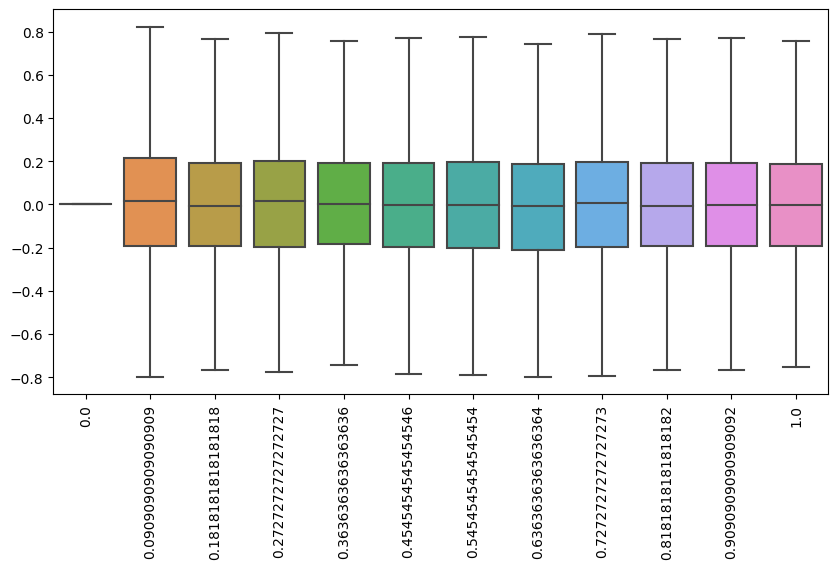

In [112]:
W = test_df.W.values.reshape(
    len(files)*1000,
    nsteps
)
X_test = test_df.W.values.reshape(
    len(files)*1000,
    nsteps
)
deltaW = np.zeros(
    (
        len(files)*1000,
        nsteps
    )
)
sigma = 0.025
for i in range(1, nsteps):
    deltaW[:, i] = W[:, i] - W[:, i - 1]
## Brownian increments
plt.figure(
    figsize = (10, 5)
)
sns.boxplot(
    x = test_df.dt.values,
    y = deltaW.reshape(
        (
            len(files)*1000*nsteps,
        )
    ),
    showfliers = False
)
plt.xticks(
    rotation = 90
)
plt.show()

In $X$ things are a little bit more tricky, since it is:

$$X_{t+1} = X_t + \sigma \Delta W = X_t + \sigma \cdot (W_{t+1} - W_t)$$

thus:
$$W_t\sim \N(0, t)$$

As a reminder $\Delta Wt = (W_t - W_{t-1})$ is an Brownian increment which are iid and follow $\N(0, dt)$ (check)

For $X$:
$$X_{t} = X_t + \sigma\cdot(W_t - W_{t-1}) = X_0 + \sigma\cdot\Delta W \sim \N(0, \sigma^2t)$$

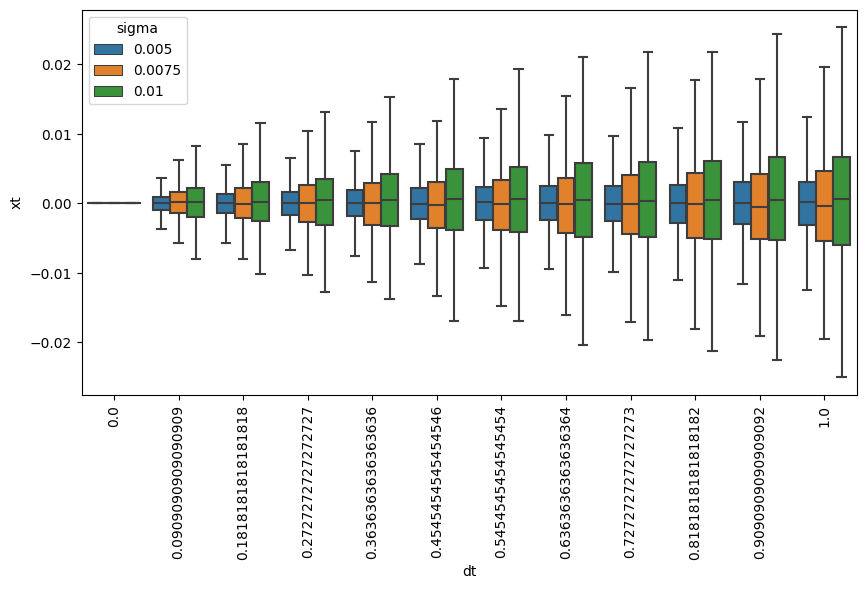

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(
    figsize = (10, 5)
)
sns.boxplot(
    x = 'dt',
    y = 'xt',
    data = test_df, 
    hue = 'sigma',
    showfliers = False
)
plt.xticks(
    rotation = 90
)
plt.show()

### Check zerobond values


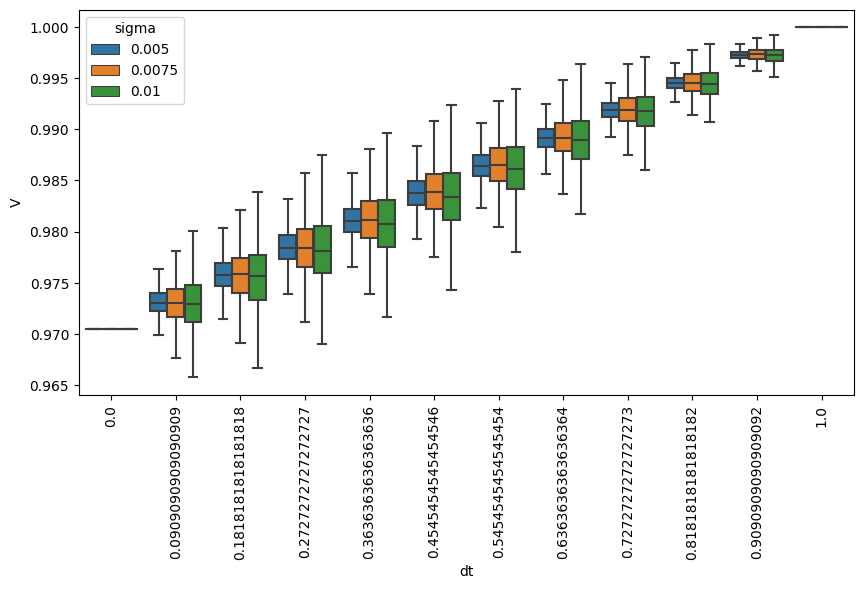

In [114]:
plt.figure(
    figsize = (10, 5)
)
sns.boxplot(
    x = 'dt',
    y = 'V',
    data = test_df, 
    hue = 'sigma',
    showfliers = False
)
plt.xticks(
    rotation = 90
)
plt.show()

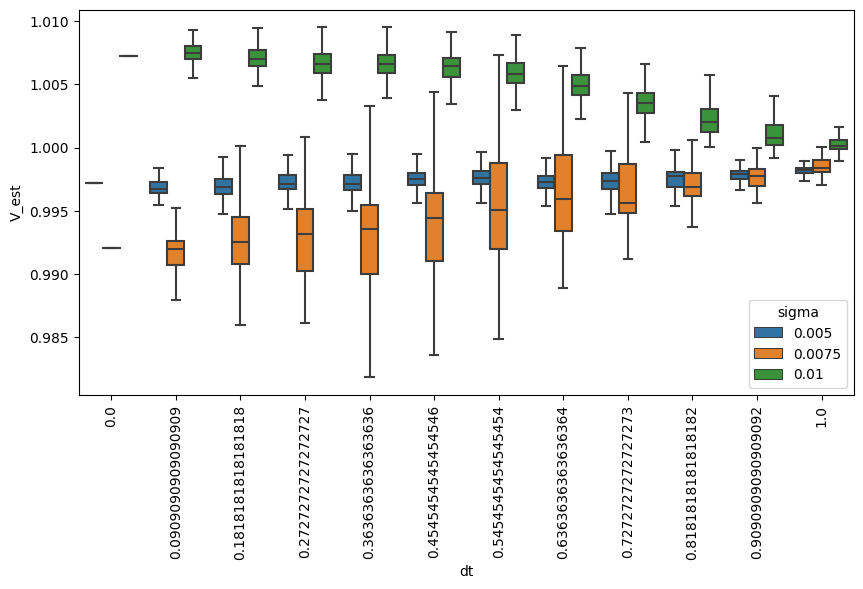

In [115]:
plt.figure(
    figsize = (10, 5)
)
sns.boxplot(
    x = 'dt',
    y = 'V_est',
    data = test_df, 
    hue = 'sigma',
    showfliers = False
)
plt.xticks(
    rotation = 90
)
plt.show()

## MAE analysis per time

In [116]:
def mse(x, y):
    return np.mean((x - y)**2)

def mae(x, y):
    return np.mean(np.abs(x - y))

def mape(x, y):
    return np.mean(np.abs(x - y) / y)

print(f'MAE: {mae(test_df.V_est, test_df.V)}')
print(f'MAPE: {mape(test_df.V_est, test_df.V)}')

MAE: 0.014206390655764517
MAPE: 0.014512760299647159


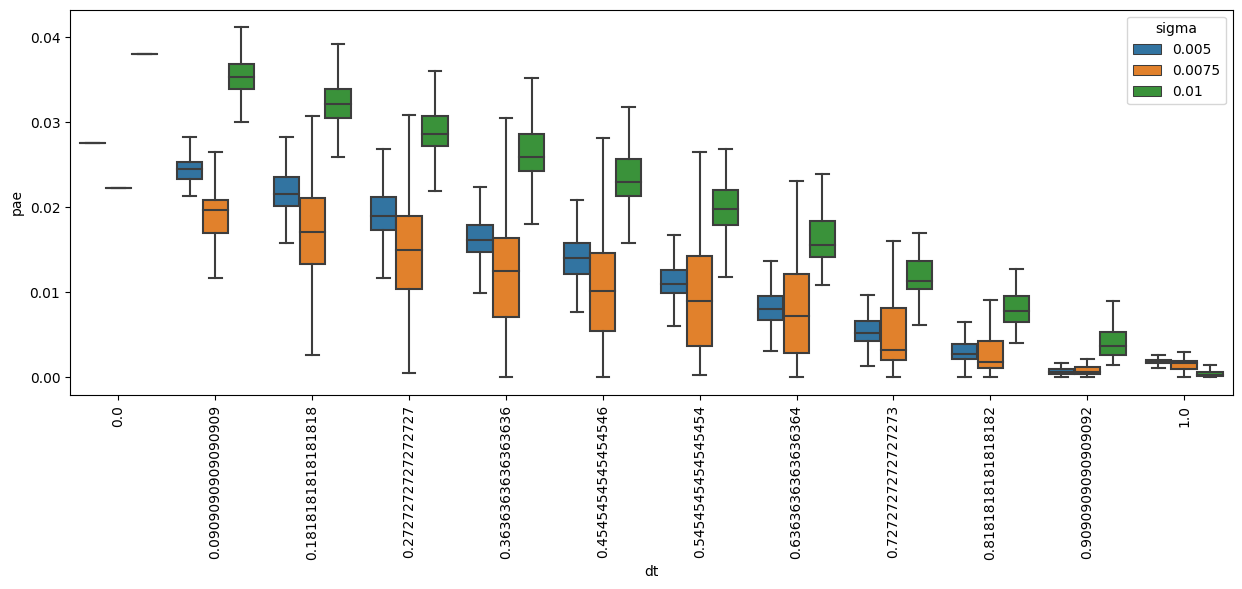

In [117]:
plt.figure(
    figsize = (15, 5)
)
sns.boxplot(
    x = 'dt',
    y = 'pae',
    data = test_df,
    hue = 'sigma',
    showfliers = False
)
plt.xticks(
    rotation = 90
)
plt.show()